**Baseline Model**

The following models were developed using the raw dataset.

1. Logistic Regression
2. LDA
3. KNN
4. Decision tree
5. Random Forest
6. SVM
7. Bagging 
8. Boosting
9. QDA

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import h5py
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import pickle

from sklearn.decomposition import PCA
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading bidir dataset
pickle_in = open("X_train_bidir.pickle","rb")
X_training_bidir = pickle.load(pickle_in)

pickle_in = open("y_train_bidir.pickle","rb")
y_training_bidir = pickle.load(pickle_in)

pickle_in = open("X_test_bidir.pickle","rb")
X_test_bidir = pickle.load(pickle_in)

pickle_in = open("y_test_bidir.pickle","rb")
y_test_bidir = pickle.load(pickle_in)

In [3]:
#loading unidir dataset
pickle_in = open("X_train_unidir.pickle","rb")
X_training_unidir = pickle.load(pickle_in)

pickle_in = open("y_train_unidir.pickle","rb")
y_training_unidir = pickle.load(pickle_in)

pickle_in = open("X_test_unidir.pickle","rb")
X_test_unidir = pickle.load(pickle_in)

pickle_in = open("y_test_unidir.pickle","rb")
y_test_unidir = pickle.load(pickle_in)

In [4]:
print('X_training_bidir :',X_training_bidir.shape)
print('y_training_bidir :',y_training_bidir.shape)
print('X_test_bidir     :',X_test_bidir.shape)
print('y_test_bidir     :',y_test_bidir.shape)

X_training_bidir : (3820, 54)
y_training_bidir : (3820,)
X_test_bidir     : (38316, 54)
y_test_bidir     : (38316,)


In [5]:
print('X_training_unidir :',X_training_unidir.shape)
print('y_training_unidir :',y_training_unidir.shape)
print('X_test_unidir     :',X_test_unidir.shape)
print('y_test_unidir     :',y_test_unidir.shape)

X_training_unidir : (2421, 18)
y_training_unidir : (2421,)
X_test_unidir     : (24179, 18)
y_test_unidir     : (24179,)


In [6]:
# CV from bidirectional dataset
X_bidir_train, X_bidir_val, y_bidir_train, y_bidir_val = train_test_split(X_training_bidir, y_training_bidir, test_size=0.2, random_state=1)

In [7]:
print('X_bidir_train   :',X_bidir_train.shape)
print('y_bidir_train   :',y_bidir_train.shape)
print('X_bidir_val     :',X_bidir_val.shape)
print('y_bidir_val     :',y_bidir_val.shape)

X_bidir_train   : (3056, 54)
y_bidir_train   : (3056,)
X_bidir_val     : (764, 54)
y_bidir_val     : (764,)


In [8]:
X_unidir_train, X_unidir_val, y_unidir_train, y_unidir_val = train_test_split(X_training_unidir, y_training_unidir, test_size=0.2, random_state=1)

In [9]:
print('X_unidir_train   :',X_unidir_train.shape)
print('y_unidir_train   :',y_unidir_train.shape)
print('X_unidir_val     :',X_unidir_val.shape)
print('y_unidir_val     :',y_unidir_val.shape)

X_unidir_train   : (1936, 18)
y_unidir_train   : (1936,)
X_unidir_val     : (485, 18)
y_unidir_val     : (485,)


In [10]:
X_bidir_val.shape

(764, 54)

***Logistic Regression***

**Bidir**

In [10]:
clf = LogisticRegression(random_state=42)
clf.fit(X_bidir_train, y_bidir_train)

LogisticRegression(random_state=42)

In [11]:
#Training performance
y_train_pred_lr = clf.predict(X_bidir_train)
acc = accuracy_score(y_bidir_train, y_train_pred_lr, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_bidir_train, y_train_pred_lr)}\n")

Accuracy: 0.9685863874345549 , Misclassification error: 0.03141361256544506
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1454
         1.0       0.98      0.96      0.97      1602

    accuracy                           0.97      3056
   macro avg       0.97      0.97      0.97      3056
weighted avg       0.97      0.97      0.97      3056




Confusion matrix:
[[1430   24]
 [  72 1530]]


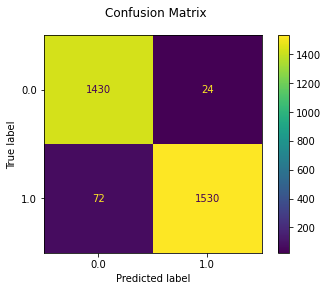

In [14]:
disp = metrics.plot_confusion_matrix(clf, X_bidir_train, y_bidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
#Validation performance
y_pred_lr = clf.predict(X_bidir_val)
acc = accuracy_score(y_bidir_val, y_pred_lr, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9554973821989529 , Misclassification error: 0.04450261780104714


In [16]:
print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_bidir_val, y_pred_lr)}\n")

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       387
         1.0       0.97      0.94      0.95       377

    accuracy                           0.96       764
   macro avg       0.96      0.96      0.96       764
weighted avg       0.96      0.96      0.96       764




Confusion matrix:
[[377  10]
 [ 24 353]]


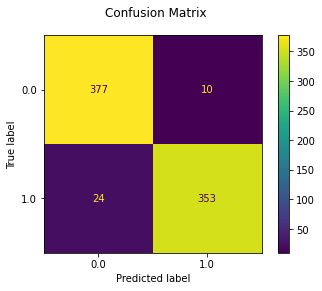

In [17]:
disp = metrics.plot_confusion_matrix(clf, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [18]:
#Get Performance by Class
pd.crosstab(y_bidir_val, y_pred_lr, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,377,10,387
1.0,24,353,377
All,401,363,764


In [19]:
#Test performance
yt_pred_lr = clf.predict(X_test_bidir)
acc = accuracy_score(y_test_bidir, yt_pred_lr, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9596774193548387 , Misclassification error: 0.040322580645161255


In [20]:
print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test_bidir, yt_pred_lr)}\n")

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     18179
         1.0       0.98      0.94      0.96     20137

    accuracy                           0.96     38316
   macro avg       0.96      0.96      0.96     38316
weighted avg       0.96      0.96      0.96     38316




Confusion matrix:
[[17805   374]
 [ 1171 18966]]


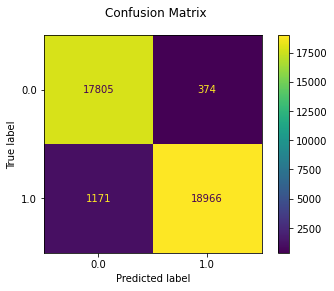

In [21]:
disp = metrics.plot_confusion_matrix(clf, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [22]:
#Get Performance by Class
pd.crosstab(y_test_bidir, yt_pred_lr, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,17805,374,18179
1.0,1171,18966,20137
All,18976,19340,38316


**Unidir**

In [12]:
clf_uni = LogisticRegression(random_state=42)
clf_uni.fit(X_unidir_train, y_unidir_train)

LogisticRegression(random_state=42)

In [13]:
#Training performance
y_train_pred_lr_uni = clf_uni.predict(X_unidir_train)
acc = accuracy_score(y_unidir_train, y_train_pred_lr_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9302685950413223 , Misclassification error: 0.06973140495867769


In [24]:
y_train_pred_lr_uni = clf_uni.predict(X_unidir_train)
print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_unidir_train, y_train_pred_lr_uni)}\n")

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       899
         1.0       0.97      0.89      0.93      1037

    accuracy                           0.93      1936
   macro avg       0.93      0.93      0.93      1936
weighted avg       0.93      0.93      0.93      1936




Confusion matrix:
[[873  26]
 [110 927]]


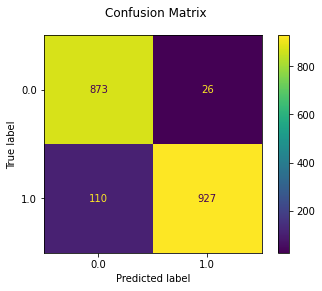

In [25]:
disp = metrics.plot_confusion_matrix(clf_uni, X_unidir_train, y_unidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [26]:
#validdaton performance
y_pred_lr_uni = clf_uni.predict(X_unidir_val)
acc = accuracy_score(y_unidir_val, y_pred_lr_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9381443298969072 , Misclassification error: 0.061855670103092786


In [27]:
print(f"Classification report for classifier {clf_uni}:\n"
f"{metrics.classification_report(y_unidir_val, y_pred_lr_uni)}\n")

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       243
         1.0       0.98      0.89      0.94       242

    accuracy                           0.94       485
   macro avg       0.94      0.94      0.94       485
weighted avg       0.94      0.94      0.94       485




Confusion matrix:
[[239   4]
 [ 26 216]]


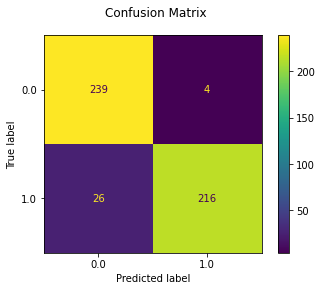

In [28]:
disp = metrics.plot_confusion_matrix(clf_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [29]:
#Get Performance by Class
pd.crosstab(y_unidir_val, y_pred_lr_uni, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,239,4,243
1.0,26,216,242
All,265,220,485


In [30]:
#Test performance
yt_pred_lr_uni = clf_uni.predict(X_test_unidir)
acc = accuracy_score(y_test_unidir, yt_pred_lr_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9292361139832086 , Misclassification error: 0.0707638860167914


In [31]:
print(f"Classification report for classifier {clf_uni}:\n"
f"{metrics.classification_report(y_test_unidir, yt_pred_lr_uni)}\n")

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     11287
         1.0       0.97      0.90      0.93     12892

    accuracy                           0.93     24179
   macro avg       0.93      0.93      0.93     24179
weighted avg       0.93      0.93      0.93     24179




Confusion matrix:
[[10924   363]
 [ 1348 11544]]


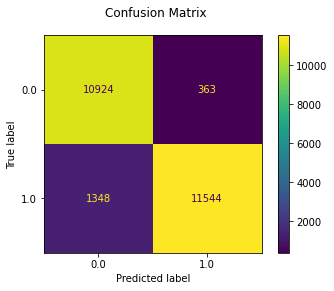

In [32]:
disp = metrics.plot_confusion_matrix(clf_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [33]:
#Get Performance by Class
pd.crosstab(y_test_unidir, yt_pred_lr_uni, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,10924,363,11287
1.0,1348,11544,12892
All,12272,11907,24179


*******************************************************************

***LDA***

**Bidir**

In [14]:
lda = LinearDiscriminantAnalysis(solver='svd')

In [15]:
ytrain_pred = lda.fit(X_bidir_train, y_bidir_train).predict(X_bidir_train)

In [16]:
#Training performance
acc = accuracy_score(y_bidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 1.0 , Misclassification error: 0.0


In [36]:
print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_bidir_train, ytrain_pred)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [37]:
#validation performance
y_pred = lda.fit(X_bidir_train, y_bidir_train).predict(X_bidir_val)

In [38]:
lda.score(X_bidir_val,y_bidir_val)

1.0

In [39]:
print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_bidir_val, y_pred)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Confusion matrix:
[[387   0]
 [  0 377]]


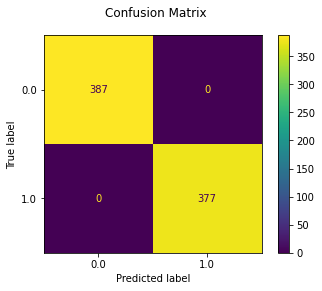

In [40]:
disp = metrics.plot_confusion_matrix(lda, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [41]:
#Predicting the Testdata using LDA 
y_pred_test = lda.fit(X_bidir_train, y_bidir_train).predict(X_test_bidir)
lda.score(X_test_bidir, y_test_bidir)


0.9997651111807078

In [42]:
print(f"Testdata Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_test_bidir, y_pred_test)}\n")

Testdata Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Testdata Confusion matrix:
[[18170     9]
 [    0 20137]]


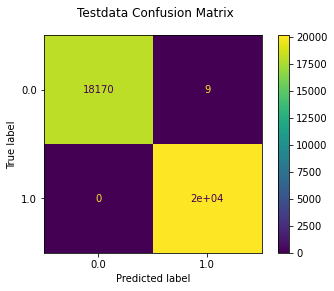

In [43]:
disp = metrics.plot_confusion_matrix(lda, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [22]:
lda_uni = LinearDiscriminantAnalysis(solver='svd')

In [23]:
ytrain_pred_uni = lda_uni.fit(X_unidir_train, y_unidir_train).predict(X_unidir_train)

In [24]:
#Training performance
acc = accuracy_score(y_unidir_train, ytrain_pred_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9519628099173554 , Misclassification error: 0.04803719008264462


In [25]:
print(f"Classification report for classifier {lda_uni}:\n"
f"{metrics.classification_report(y_unidir_train, ytrain_pred_uni)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95       899
         1.0       0.93      0.99      0.96      1037

    accuracy                           0.95      1936
   macro avg       0.96      0.95      0.95      1936
weighted avg       0.95      0.95      0.95      1936




Training Confusion matrix:
[[ 819   80]
 [  13 1024]]


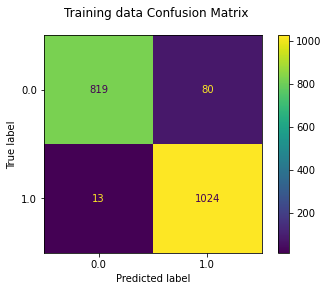

In [28]:
disp = metrics.plot_confusion_matrix(lda_uni, X_unidir_train, y_unidir_train)
disp.figure_.suptitle("Training data Confusion Matrix")
print(f"Training Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [47]:
#validation performance
y_pred_uni = lda_uni.fit(X_unidir_train, y_unidir_train).predict(X_unidir_val)

In [48]:
lda_uni.score(X_unidir_val, y_unidir_val)

0.9525773195876288

In [49]:
print(f"Classification report for classifier {lda_uni}:\n"
f"{metrics.classification_report(y_unidir_val, y_pred_uni)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       243
         1.0       0.93      0.98      0.95       242

    accuracy                           0.95       485
   macro avg       0.95      0.95      0.95       485
weighted avg       0.95      0.95      0.95       485




Confusion matrix:
[[224  19]
 [  4 238]]


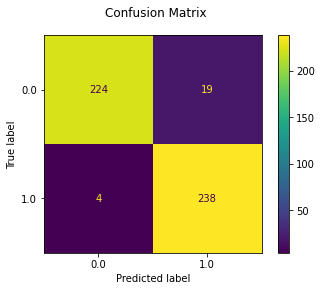

In [50]:
disp = metrics.plot_confusion_matrix(lda_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [51]:
#Predicting the Testdata using LDA 
y_pred_test_uni = lda_uni.fit(X_unidir_train, y_unidir_train).predict(X_test_unidir)
lda.score(X_test_bidir, y_test_bidir)


0.9997651111807078

In [52]:
print(f"Testdata Classification report for classifier {lda_uni}:\n"
f"{metrics.classification_report(y_test_unidir, y_pred_test_uni)}\n")

Testdata Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     11287
         1.0       0.93      0.99      0.96     12892

    accuracy                           0.96     24179
   macro avg       0.96      0.95      0.96     24179
weighted avg       0.96      0.96      0.96     24179




Testdata Confusion matrix:
[[10392   895]
 [  156 12736]]


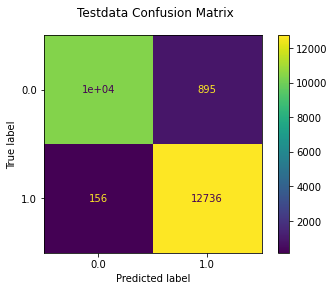

In [53]:
disp = metrics.plot_confusion_matrix(lda_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**************

***KNN***

**Bidir**

In [29]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_bidir_train, y_bidir_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
train_predicted = neigh.predict(X_bidir_train) #predicting training data

In [31]:
acc = accuracy_score(y_bidir_train, train_predicted, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Accuracy: 0.9986910994764397 , Misclassification error: 0.0013089005235602524


In [32]:
print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_bidir_train, train_predicted)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




Training Performance: 
Confusion matrix:
[[1451    3]
 [   1 1601]]


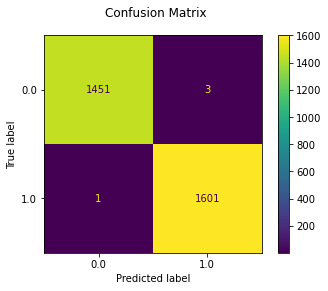

In [33]:
print('Training Performance: ')
disp = metrics.plot_confusion_matrix(neigh, X_bidir_train, y_bidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [34]:
print('Validation performance :')
acc = accuracy_score(y_bidir_val, neigh.predict(X_bidir_val), normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Validation performance :
Accuracy: 0.9986910994764397 , Misclassification error: 0.0013089005235602524


In [57]:
print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_bidir_val, neigh.predict(X_bidir_val))}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Confusion matrix:
[[386   1]
 [  0 377]]


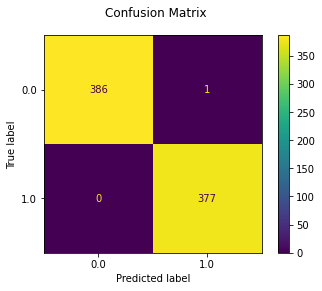

In [58]:
disp = metrics.plot_confusion_matrix(neigh, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [36]:
test_predicted = neigh.predict(X_test_bidir) #predicting test data 

In [37]:
print('Test performance :')
acc = accuracy_score(y_test_bidir, test_predicted, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Test performance :
Accuracy: 0.997859901868671 , Misclassification error: 0.0021400981313289824


In [38]:
print(f" Testdata Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_test_bidir, test_predicted)}\n")

 Testdata Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Testdata Confusion matrix:
[[18120    59]
 [   23 20114]]


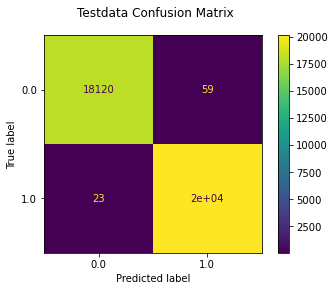

In [39]:
disp = metrics.plot_confusion_matrix(neigh, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [62]:
#Get Performance by Class
pd.crosstab(y_test_bidir, test_predicted, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,18120,59,18179
1.0,23,20114,20137
All,18143,20173,38316


**Unidir**

In [40]:
neigh_uni = KNeighborsClassifier(n_neighbors=3)
neigh_uni.fit(X_unidir_train, y_unidir_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
train_predicted_uni = neigh_uni.predict(X_unidir_train)#predicting train data 

In [42]:
print('Training performance :')
acc = accuracy_score(y_unidir_train, train_predicted_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Training performance :
Accuracy: 0.9994834710743802 , Misclassification error: 0.0005165289256198191


In [65]:
print(f"Classification report for classifier {neigh_uni}:\n"
f"{metrics.classification_report(y_unidir_train, train_predicted_uni)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936




Confusion matrix:
[[ 898    1]
 [   0 1037]]


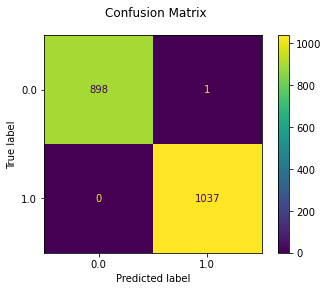

In [43]:
disp = metrics.plot_confusion_matrix(neigh_uni, X_unidir_train, y_unidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [44]:
print('Validation performance :')
acc = accuracy_score(y_unidir_val, neigh_uni.predict(X_unidir_val), normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Validation performance :
Accuracy: 0.9979381443298969 , Misclassification error: 0.0020618556701030855


In [67]:
print(f"Classification report for classifier {neigh_uni}:\n"
f"{metrics.classification_report(y_unidir_val, neigh_uni.predict(X_unidir_val))}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       243
         1.0       1.00      1.00      1.00       242

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485




Confusion matrix:
[[243   0]
 [  1 241]]


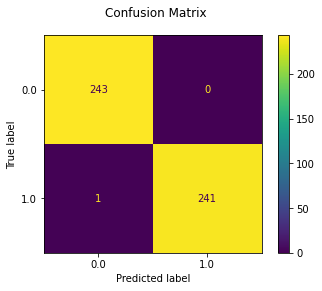

In [68]:
disp = metrics.plot_confusion_matrix(neigh_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [45]:
test_predicted_uni = neigh_uni.predict(X_test_unidir)#predicting test data 

In [46]:
print('Test performance :')
acc = accuracy_score(y_test_unidir, test_predicted_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Test performance :
Accuracy: 0.9980975226436164 , Misclassification error: 0.0019024773563836028


In [70]:
print(f" Testdata Classification report for classifier {neigh_uni}:\n"
f"{metrics.classification_report(y_test_unidir, test_predicted_uni)}\n")

 Testdata Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11287
         1.0       1.00      1.00      1.00     12892

    accuracy                           1.00     24179
   macro avg       1.00      1.00      1.00     24179
weighted avg       1.00      1.00      1.00     24179




Testdata Confusion matrix:
[[11245    42]
 [    4 12888]]


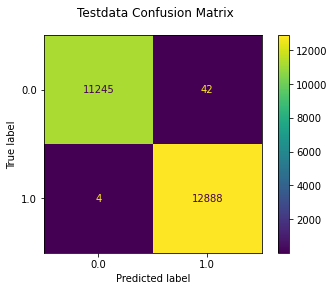

In [71]:
disp = metrics.plot_confusion_matrix(neigh_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [72]:
#Get Performance by Class
pd.crosstab(y_test_unidir, test_predicted_uni, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,11245,42,11287
1.0,4,12888,12892
All,11249,12930,24179


**************

***Decision Tree***

**Bidir**

In [47]:
DTclf = DecisionTreeClassifier(random_state=0)
DTclf.fit(X_bidir_train, y_bidir_train)

DecisionTreeClassifier(random_state=0)

In [48]:
print('Training performance :')
acc = accuracy_score(y_bidir_train, DTclf.predict(X_bidir_train), normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Training performance :
Accuracy: 1.0 , Misclassification error: 0.0


In [75]:
print(f"Training data Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_bidir_train, DTclf.predict(X_bidir_train))}\n")

Training data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [76]:
print(f"Validation data Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_bidir_val, DTclf.predict(X_bidir_val))}\n")

Validation data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Confusion matrix:
[[387   0]
 [  0 377]]


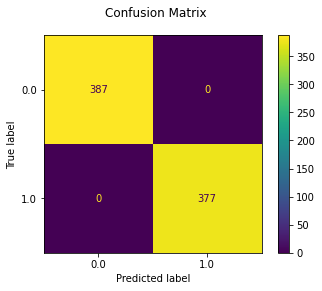

In [77]:
disp = metrics.plot_confusion_matrix(DTclf, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

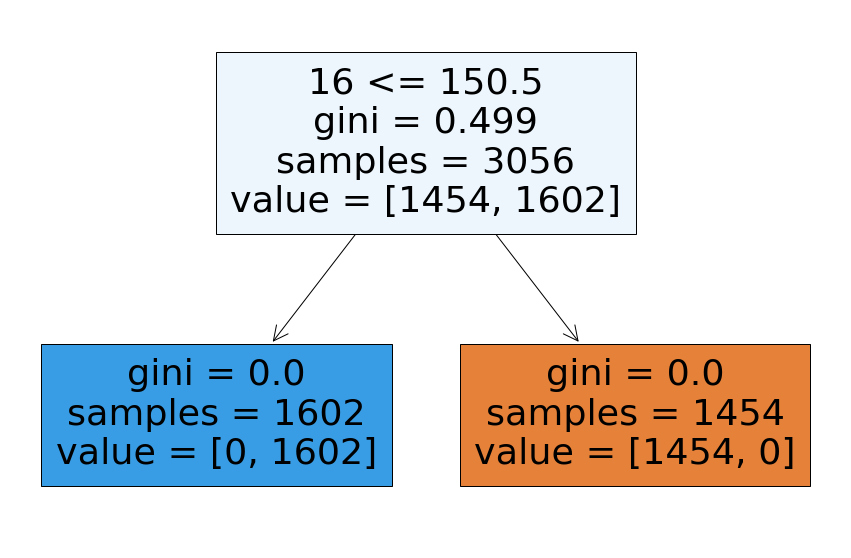

In [78]:
#visualizing decision tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTclf, feature_names=X_training_bidir.columns, filled=True)

In [79]:
DTy_pred = DTclf.predict(X_test_bidir) #predicting test data 

In [80]:
print("Test accuracy:", DTclf.score(X_test_bidir, y_test_bidir))

Test accuracy: 1.0


In [81]:
print(f"Testdata Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_test_bidir, DTy_pred)}\n")

Testdata Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Testdata Confusion matrix:
[[18179     0]
 [    0 20137]]


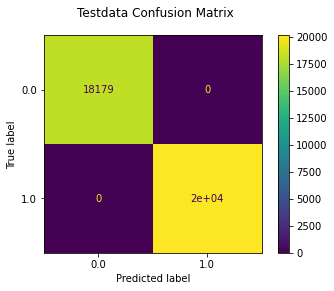

In [82]:
disp = metrics.plot_confusion_matrix(DTclf, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [83]:
DTclf_uni = DecisionTreeClassifier(random_state=0)
DTclf_uni.fit(X_unidir_train, y_unidir_train)

DecisionTreeClassifier(random_state=0)

In [84]:
print(f"Training data Classification report for classifier {DTclf_uni}:\n"
f"{metrics.classification_report(y_unidir_train, DTclf_uni.predict(X_unidir_train))}\n")

Training data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936




In [85]:
print(f"Validation data Classification report for classifier {DTclf_uni}:\n"
f"{metrics.classification_report(y_unidir_val, DTclf_uni.predict(X_unidir_val))}\n")

Validation data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       243
         1.0       1.00      1.00      1.00       242

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485




Confusion matrix:
[[243   0]
 [  0 242]]


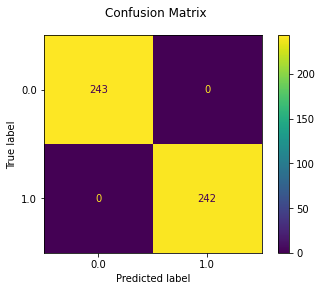

In [86]:
disp = metrics.plot_confusion_matrix(DTclf_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

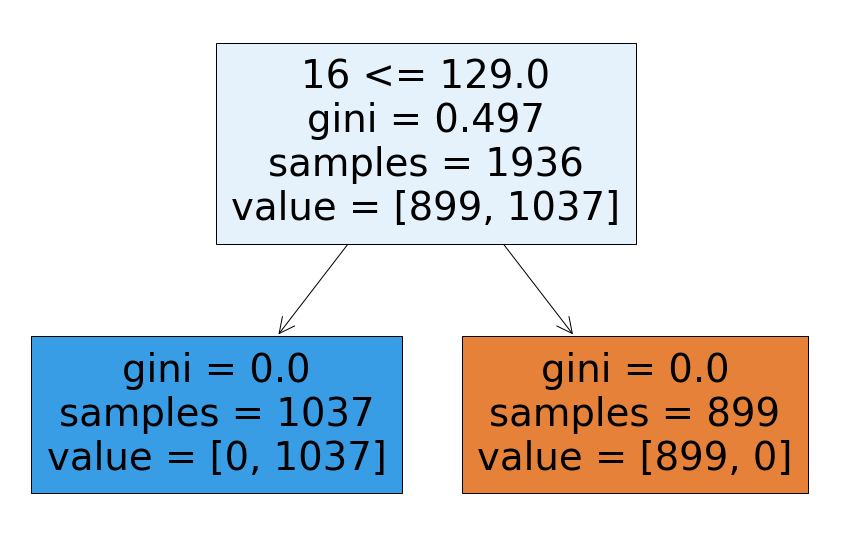

In [87]:
#visualizing decision tree 
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTclf_uni, feature_names=X_training_unidir.columns, filled=True)

In [88]:
DTy_pred_uni = DTclf_uni.predict(X_test_unidir) #predicting test data 

In [89]:
print("Test accuracy:", DTclf_uni.score(X_test_unidir, y_test_unidir))

Test accuracy: 0.9995450597626039


In [90]:
print(f"Testdata Classification report for classifier {DTclf_uni}:\n"
f"{metrics.classification_report(y_test_unidir, DTy_pred_uni)}\n")

Testdata Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11287
         1.0       1.00      1.00      1.00     12892

    accuracy                           1.00     24179
   macro avg       1.00      1.00      1.00     24179
weighted avg       1.00      1.00      1.00     24179




Testdata Confusion matrix:
[[11287     0]
 [   11 12881]]


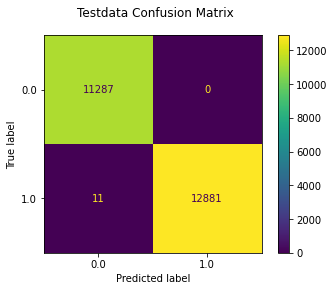

In [91]:
disp = metrics.plot_confusion_matrix(DTclf_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

*********************

***Random Forest***

**Bidir**

In [59]:
RFclf = RandomForestClassifier(max_features=7, random_state=1)   #m = sqrt(p); m = sqrt(54) ~ 7
RFclf.fit(X_bidir_train, y_bidir_train)

RandomForestClassifier(max_features=7, random_state=1)

In [60]:
print(f"Training data Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_bidir_train, RFclf.predict(X_bidir_train))}\n")

Training data Classification report for classifier RandomForestClassifier(max_features=7, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [61]:
print(f"Validation data Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_bidir_val, RFclf.predict(X_bidir_val))}\n")

Validation data Classification report for classifier RandomForestClassifier(max_features=7, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Confusion matrix:
[[387   0]
 [  0 377]]


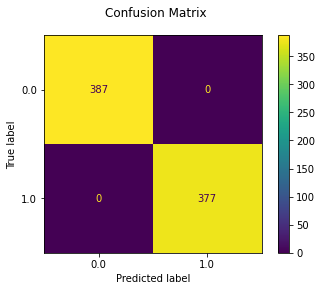

In [62]:
disp = metrics.plot_confusion_matrix(RFclf, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [63]:
RFy_pred = RFclf.predict(X_test_bidir)#predicting test data 

In [64]:
print(f"Testdata Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_test_bidir, RFy_pred)}\n")

Testdata Classification report for classifier RandomForestClassifier(max_features=7, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Testdata Confusion matrix:
[[18179     0]
 [    0 20137]]


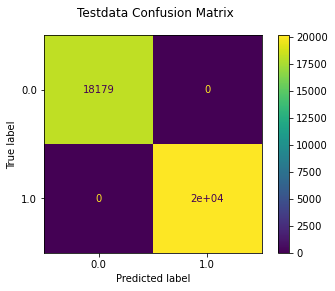

In [65]:
disp = metrics.plot_confusion_matrix(RFclf, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

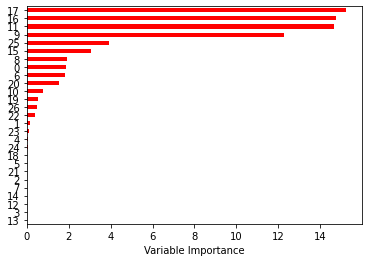

In [69]:
#Variable importance 
feature_importance = RFclf.feature_importances_*100
Importance = pd.DataFrame({'Importance':feature_importance[0:27]}, index=X_bidir_train.columns[0:27])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

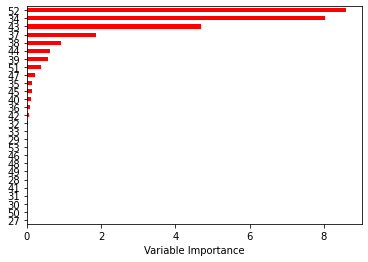

In [70]:
#Variable importance 
feature_importance = RFclf.feature_importances_*100
Importance = pd.DataFrame({'Importance':feature_importance[27:54]}, index=X_bidir_train.columns[27:54])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**Unidir**

In [42]:
RFclf_uni = RandomForestClassifier(max_features=4, random_state=1)   #m = sqrt(p); m = sqrt(18) ~ 4
RFclf_uni.fit(X_unidir_train, y_unidir_train)

RandomForestClassifier(max_features=4, random_state=1)

In [43]:
print(f"Training data Classification report for classifier {RFclf_uni}:\n"
f"{metrics.classification_report(y_unidir_train, RFclf_uni.predict(X_unidir_train))}\n")

Training data Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936




In [45]:
print(f"Validation data Classification report for classifier {RFclf_uni}:\n"
f"{metrics.classification_report(y_unidir_val, RFclf_uni.predict(X_unidir_val))}\n")

Validation data Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       243
         1.0       1.00      1.00      1.00       242

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485




Confusion matrix:
[[243   0]
 [  0 242]]


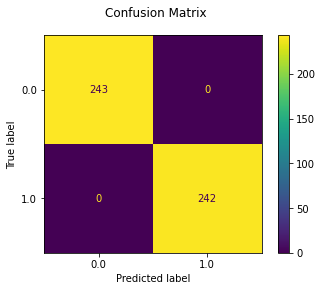

In [46]:
disp = metrics.plot_confusion_matrix(RFclf_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [47]:
RFy_pred_uni = RFclf_uni.predict(X_test_unidir)#predicting test data 

In [48]:
print(f"Testdata Classification report for classifier {RFclf_uni}:\n"
f"{metrics.classification_report(y_test_unidir, RFy_pred_uni)}\n")

Testdata Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11287
         1.0       1.00      1.00      1.00     12892

    accuracy                           1.00     24179
   macro avg       1.00      1.00      1.00     24179
weighted avg       1.00      1.00      1.00     24179




Testdata Confusion matrix:
[[11282     5]
 [    0 12892]]


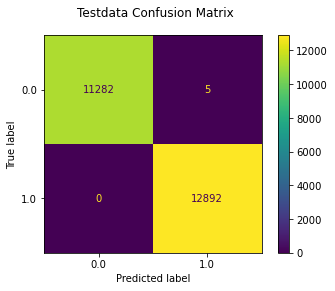

In [49]:
disp = metrics.plot_confusion_matrix(RFclf_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

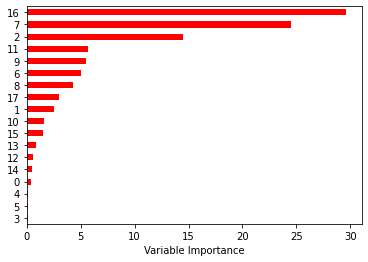

In [50]:
#Variable importance 
Importance = pd.DataFrame({'Importance':RFclf_uni.feature_importances_*100}, index=X_unidir_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

*****************

***SVM***

**Bidir**

In [18]:
svc = svm.SVC(kernel='poly', C=1, gamma='auto').fit(X_bidir_train, y_bidir_train)

In [19]:
print('Training performance :')
acc = accuracy_score(y_bidir_train,svc.predict(X_bidir_train), normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Training performance :
Accuracy: 1.0 , Misclassification error: 0.0


In [20]:
print(f"Training data Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_bidir_train, svc.predict(X_bidir_train))}\n")

Training data Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [21]:
ypred = svc.predict(X_bidir_val)#predicting validation data 

In [22]:
print('Validation performance :')
acc = accuracy_score(y_bidir_val,ypred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Validation performance :
Accuracy: 1.0 , Misclassification error: 0.0


In [23]:
print(f"Validation data Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_bidir_val, ypred)}\n")

Validation data Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Validation Confusion matrix:
[[387   0]
 [  0 377]]


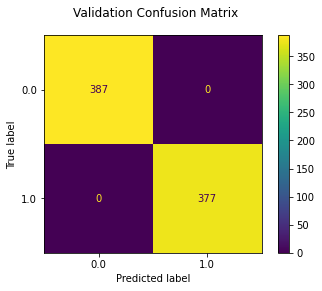

In [24]:
disp = metrics.plot_confusion_matrix(svc, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Validation Confusion Matrix")
print(f"Validation Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [25]:
SVMy_pred = svc.predict(X_test_bidir)#predicting test data 

In [26]:
print('Test performance :')
acc = accuracy_score(y_test_bidir,SVMy_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Test performance :
Accuracy: 0.9986167658419459 , Misclassification error: 0.0013832341580540808


In [27]:
print(f"Testdata Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_test_bidir, SVMy_pred)}\n")

Testdata Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Testdata Confusion matrix:
[[18135    44]
 [    9 20128]]


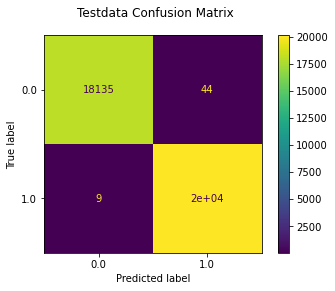

In [28]:
disp = metrics.plot_confusion_matrix(svc, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [29]:
pd.crosstab(y_test_bidir, SVMy_pred, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,18135,44,18179
1.0,9,20128,20137
All,18144,20172,38316


**Unidir**

In [30]:
svc_uni = svm.SVC(kernel='poly', C=1, gamma='auto').fit(X_unidir_train, y_unidir_train)

In [31]:
print('Training performance :')
acc = accuracy_score(y_unidir_train,svc_uni.predict(X_unidir_train), normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Training performance :
Accuracy: 1.0 , Misclassification error: 0.0


In [32]:
print(f"Training data Classification report for classifier {svc_uni}:\n"
f"{metrics.classification_report(y_unidir_train, svc_uni.predict(X_unidir_train))}\n")

Training data Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936




In [33]:
ypred_uni = svc_uni.predict(X_unidir_val)#predicting validation data 

In [34]:
print('Training performance :')
acc = accuracy_score(y_unidir_val,ypred_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Training performance :
Accuracy: 0.9979381443298969 , Misclassification error: 0.0020618556701030855


In [35]:
print(f"Validation data Classification report for classifier {svc_uni}:\n"
f"{metrics.classification_report(y_unidir_val, ypred_uni)}\n")

Validation data Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       243
         1.0       1.00      1.00      1.00       242

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485




Validation Confusion matrix:
[[243   0]
 [  1 241]]


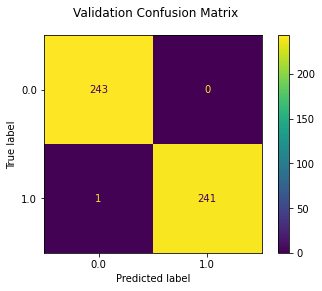

In [36]:
disp = metrics.plot_confusion_matrix(svc_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Validation Confusion Matrix")
print(f"Validation Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [37]:
SVMy_pred_uni = svc_uni.predict(X_test_unidir)#predicting test data 

In [38]:
print('Test performance :')
acc = accuracy_score(y_test_unidir,SVMy_pred_uni, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

Test performance :
Accuracy: 0.9988833285082096 , Misclassification error: 0.0011166714917903997


In [39]:
print(f"Testdata Classification report for classifier {svc_uni}:\n"
f"{metrics.classification_report(y_test_unidir, SVMy_pred_uni)}\n")

Testdata Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11287
         1.0       1.00      1.00      1.00     12892

    accuracy                           1.00     24179
   macro avg       1.00      1.00      1.00     24179
weighted avg       1.00      1.00      1.00     24179




Testdata Confusion matrix:
[[11286     1]
 [   26 12866]]


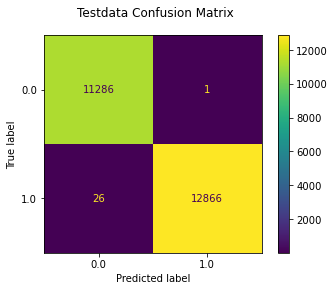

In [40]:
disp = metrics.plot_confusion_matrix(svc_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Testdata Confusion Matrix")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [41]:
pd.crosstab(y_test_unidir, SVMy_pred_uni, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,11286,1,11287
1.0,26,12866,12892
All,11312,12867,24179


#### Boosting 

#### Bidirectional 

In [93]:
boostclass = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, random_state=1)
boostclass.fit(X_bidir_train, y_bidir_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1)

25    3.598914e-15
12    1.724399e-14
15    2.136926e-14
20    3.205137e-14
7     3.430973e-14
21    3.571901e-14
19    4.865458e-14
14    5.049378e-14
10    5.510137e-14
26    5.776592e-14
23    6.133289e-14
13    6.266621e-14
2     6.451866e-14
3     6.734201e-14
24    6.996394e-14
18    7.943354e-14
22    8.032786e-14
5     8.282709e-14
6     8.349929e-14
1     8.354023e-14
4     9.084096e-14
8     9.438307e-14
0     9.916707e-14
9     1.869825e+01
11    1.901995e+01
17    1.999508e+01
16    2.107518e+01
dtype: float64


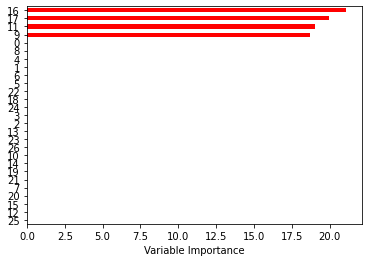

In [95]:
#Visualising the important features
feature_importance = boostclass.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:27], index=X_bidir_train.columns[0:27]).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

34    1.510740e-15
30    2.267099e-15
29    8.512810e-15
43    8.558369e-15
47    1.208172e-14
48    1.578723e-14
51    1.717959e-14
33    1.917569e-14
39    2.817747e-14
44    3.398497e-14
42    3.406535e-14
38    5.646919e-14
28    5.746091e-14
49    6.124543e-14
35    6.222191e-14
40    6.529715e-14
41    6.811596e-14
31    7.030858e-14
53    7.231337e-14
27    7.588562e-14
32    8.107989e-14
36    8.798804e-14
46    9.817482e-14
45    9.890972e-14
50    1.064916e-13
37    1.064981e-13
52    2.121153e+01
dtype: float64


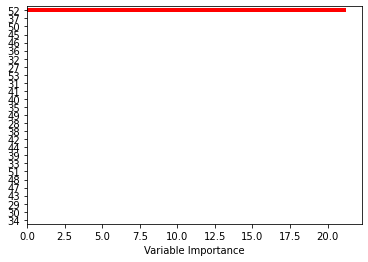

In [96]:
rel_imp = pd.Series(feature_importance[27:54], index=X_bidir_train.columns[27:54]).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764


Confusion matrix:
[[387   0]
 [  0 377]]


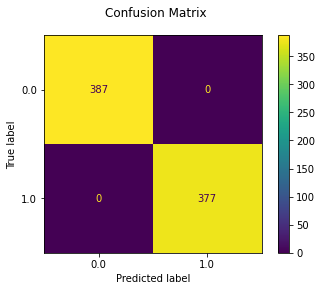

In [97]:
print('Validation Performance:')
y_pred = boostclass.predict(X_bidir_val) #prediction for validation dataset 
acc = accuracy_score(y_bidir_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_bidir_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056


Confusion matrix:
[[1454    0]
 [   0 1602]]


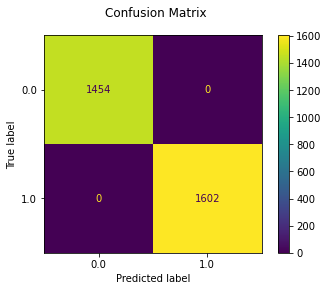

In [98]:
print('Training Performance:')
ytrain_pred = boostclass.predict(X_bidir_train) #prediction for train dataset 
acc = accuracy_score(y_bidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_bidir_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_bidir_train, y_bidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316


Testdata Confusion matrix:
[[18179     0]
 [    0 20137]]


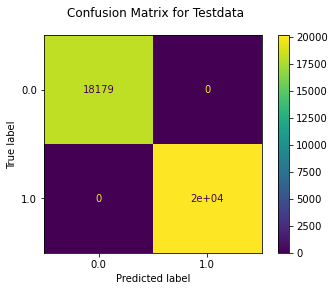

In [101]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = boostclass.predict(X_test_bidir)
acc = accuracy_score(y_test_bidir, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_test_bidir, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

15    1.228765e-14
7     2.506219e-14
11    2.653592e-14
12    3.232266e-14
4     1.107313e-13
14    1.110096e-13
3     1.157008e-13
9     1.223529e-13
17    1.274335e-13
6     1.322799e-13
5     1.327387e-13
13    1.345880e-13
0     1.382597e-13
10    1.422589e-13
8     1.442328e-13
2     1.462044e-13
1     1.589032e-13
16    1.000000e+02
dtype: float64


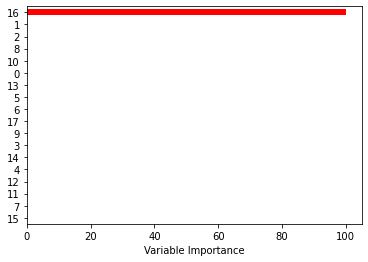

In [103]:
#Unidirectional

boostclass = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, random_state=1)
boostclass.fit(X_unidir_train, y_unidir_train)

#Visualising the important features
feature_importance = boostclass.feature_importances_*100
rel_imp = pd.Series(feature_importance[0:27], index=X_unidir_train.columns[0:27]).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936


Confusion matrix:
[[ 899    0]
 [   0 1037]]


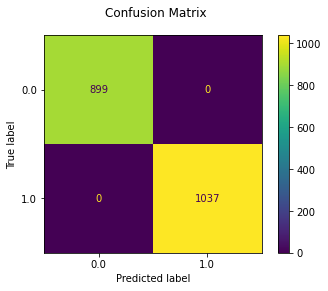

In [104]:
print('Training Performance:')
ytrain_pred = boostclass.predict(X_unidir_train) #prediction for train dataset 
acc = accuracy_score(y_unidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_unidir_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_unidir_train, y_unidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()


Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       243
         1.0       1.00      1.00      1.00       242

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485


Confusion matrix:
[[243   0]
 [  0 242]]


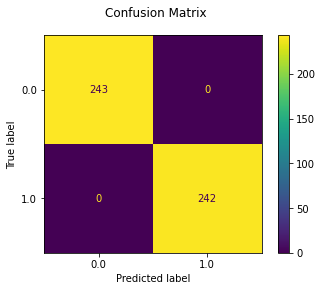

In [105]:

print('Validation Performance:')
y_pred = boostclass.predict(X_unidir_val) #prediction for validation dataset 
acc = accuracy_score(y_unidir_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_unidir_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9995450597626039 , Test Misclassification error: 0.0
Testdata Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11287
         1.0       1.00      1.00      1.00     12892

    accuracy                           1.00     24179
   macro avg       1.00      1.00      1.00     24179
weighted avg       1.00      1.00      1.00     24179


Testdata Confusion matrix:
[[11287     0]
 [   11 12881]]


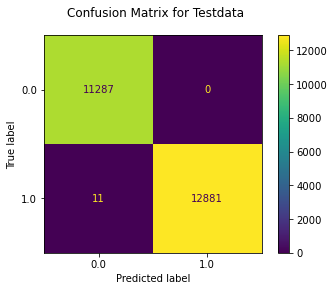

In [106]:

#Predicting the test data 
print('Test Performance:')
y_pred_test = boostclass.predict(X_test_unidir)
acc = accuracy_score(y_test_unidir, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_test_unidir, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***************

#### Bagging 

#### Bidirectional

In [109]:
#Bagging = Random forest with complete features 
bgclf = RandomForestClassifier(max_features=54, random_state=1)   
bgclf.fit(X_bidir_train, y_bidir_train)

RandomForestClassifier(max_features=54, random_state=1)

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056


Confusion matrix:
[[1454    0]
 [   0 1602]]


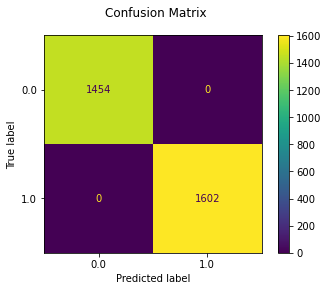

In [110]:
print('Training Performance:')
ytrain_pred = bgclf.predict(X_bidir_train) #prediction for train dataset 
acc = accuracy_score(y_bidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_bidir_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_bidir_train, y_bidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764


Confusion matrix:
[[387   0]
 [  0 377]]


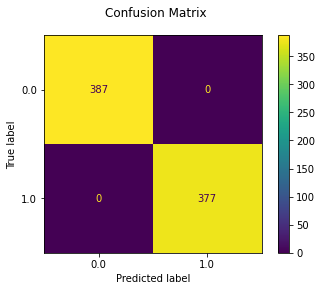

In [111]:
print('Validation Performance:')
y_pred = bgclf.predict(X_bidir_val) #prediction for validation dataset 
acc = accuracy_score(y_bidir_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_bidir_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for bagging classifier :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316


Testdata Confusion matrix:
[[18179     0]
 [    0 20137]]


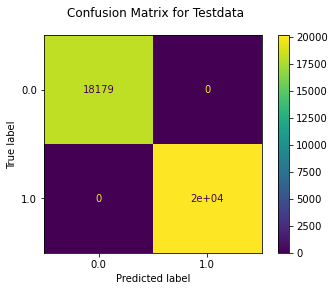

In [112]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = bgclf.predict(X_test_bidir)
acc = accuracy_score(y_test_bidir, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for bagging classifier :\n"
f"{metrics.classification_report(y_test_bidir, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#### Unidirectional

In [113]:
#Bagging = Random forest with complete features 
bgclf_uni = RandomForestClassifier(max_features=18, random_state=1)   
bgclf_uni.fit(X_unidir_train, y_unidir_train)

RandomForestClassifier(max_features=18, random_state=1)

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936


Confusion matrix:
[[ 899    0]
 [   0 1037]]


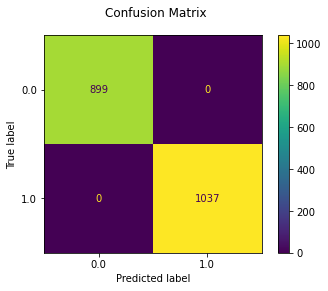

In [115]:
print('Training Performance:')
ytrain_pred = bgclf_uni.predict(X_unidir_train) #prediction for train dataset 
acc = accuracy_score(y_unidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_unidir_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf_uni, X_unidir_train, y_unidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       243
         1.0       1.00      1.00      1.00       242

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485


Confusion matrix:
[[243   0]
 [  0 242]]


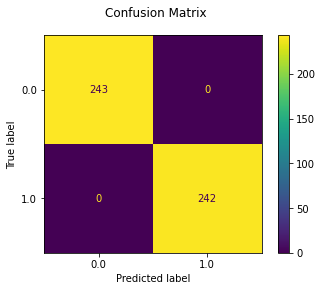

In [116]:
print('Validation Performance:')
y_pred = bgclf_uni.predict(X_unidir_val) #prediction for validation dataset 
acc = accuracy_score(y_unidir_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_unidir_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf_uni, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9995450597626039 , Test Misclassification error: 0.0
Testdata Classification report for bagging classifier :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11287
         1.0       1.00      1.00      1.00     12892

    accuracy                           1.00     24179
   macro avg       1.00      1.00      1.00     24179
weighted avg       1.00      1.00      1.00     24179


Testdata Confusion matrix:
[[11287     0]
 [   11 12881]]


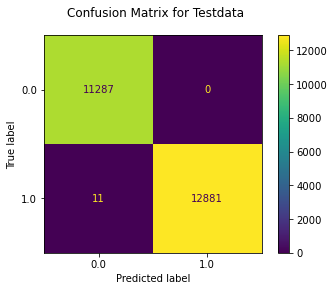

In [117]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = bgclf_uni.predict(X_test_unidir)
acc = accuracy_score(y_test_unidir, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for bagging classifier :\n"
f"{metrics.classification_report(y_test_unidir, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(bgclf_uni, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#### QDA

Bidir

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

Validation Performance:
Accuracy: 0.9947643979057592 , Misclassification error: 0.005235602094240788
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       387
         1.0       1.00      0.99      0.99       377

    accuracy                           0.99       764
   macro avg       0.99      0.99      0.99       764
weighted avg       0.99      0.99      0.99       764


Confusion matrix:
[[387   0]
 [  4 373]]


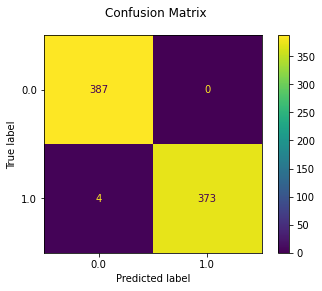

In [12]:
print('Validation Performance:')
y_pred = qda.fit(X_bidir_train, y_bidir_train).predict(X_bidir_val) #prediction for validation dataset 
acc = accuracy_score(y_bidir_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_bidir_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_bidir_val, y_bidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9973821989528796 , Misclassification error: 0.002617801047120394
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056


Confusion matrix:
[[1454    0]
 [   8 1594]]


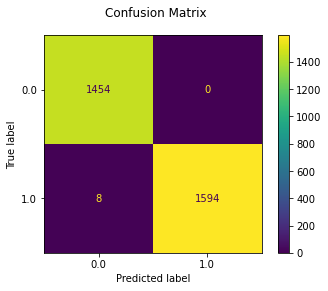

In [13]:
print('Training Performance:')
ytrain_pred = qda.fit(X_bidir_train, y_bidir_train).predict(X_bidir_train) #prediction for training dataset 
acc = accuracy_score(y_bidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_bidir_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_bidir_train, y_bidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9933448167867209 , Test Misclassification error: 0.002617801047120394
Testdata Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     18179
         1.0       1.00      0.99      0.99     20137

    accuracy                           0.99     38316
   macro avg       0.99      0.99      0.99     38316
weighted avg       0.99      0.99      0.99     38316


Testdata Confusion matrix:
[[18179     0]
 [  255 19882]]


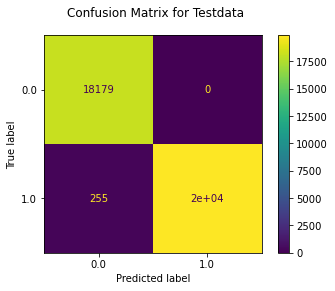

In [14]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = qda.fit(X_bidir_train, y_bidir_train).predict(X_test_bidir)
acc = accuracy_score(y_test_bidir, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_test_bidir, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(qda, X_test_bidir, y_test_bidir)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Unidir

Validation Performance:
Accuracy: 0.9814432989690721 , Misclassification error: 0.01855670103092788
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       243
         1.0       1.00      0.96      0.98       242

    accuracy                           0.98       485
   macro avg       0.98      0.98      0.98       485
weighted avg       0.98      0.98      0.98       485


Confusion matrix:
[[243   0]
 [  9 233]]


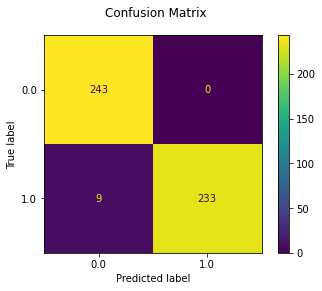

In [15]:
print('Validation Performance:')
y_pred = qda.fit(X_unidir_train, y_unidir_train).predict(X_unidir_val) #prediction for validation dataset 
acc = accuracy_score(y_unidir_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_unidir_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_unidir_val, y_unidir_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9943181818181818 , Misclassification error: 0.005681818181818232
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       899
         1.0       1.00      0.99      0.99      1037

    accuracy                           0.99      1936
   macro avg       0.99      0.99      0.99      1936
weighted avg       0.99      0.99      0.99      1936


Confusion matrix:
[[ 899    0]
 [  11 1026]]


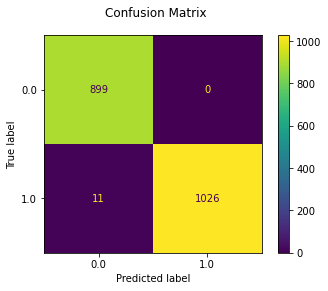

In [16]:
print('Training Performance:')
ytrain_pred = qda.fit(X_unidir_train, y_unidir_train).predict(X_unidir_train) #prediction for training dataset 
acc = accuracy_score(y_unidir_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_unidir_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_unidir_train, y_unidir_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9890400760990943 , Test Misclassification error: 0.005681818181818232
Testdata Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11287
         1.0       1.00      0.98      0.99     12892

    accuracy                           0.99     24179
   macro avg       0.99      0.99      0.99     24179
weighted avg       0.99      0.99      0.99     24179


Testdata Confusion matrix:
[[11287     0]
 [  265 12627]]


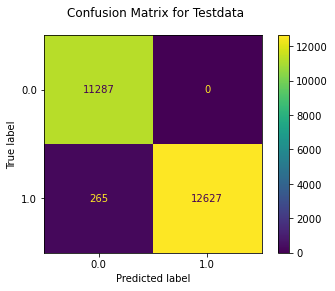

In [17]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = qda.fit(X_unidir_train, y_unidir_train).predict(X_test_unidir)
acc = accuracy_score(y_test_unidir, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_test_unidir, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(qda, X_test_unidir, y_test_unidir)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()